In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback
from timeit import default_timer as timer
import tensorflow as tf
import matplotlib.pyplot as plt

message = '--- Mengimport berbagai library yang akan digunakan pada project ini ---'
print(message)

ModuleNotFoundError: No module named 'sklearn'

In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Collecting scikit-learn
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.1/7.5 MB 2.6 MB/s eta 0:00:03
     - -------------------------------------- 0.2/7.5 MB 2.2 MB/s eta 0:00:04
     -- ------------------------------------- 0.4/7.5 MB 2.8 MB/s eta 0:00:03
     -- ------------------------------------- 0.5/7.5 MB 2.8 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/7.5 MB 3.0 MB/s eta 0:00:03
     ---- ----------------------------------- 0.8/7.5 MB 3.0 MB/s eta 0:00:03
     ----- ---------------------------------- 1.0/7.5 MB 3.1 MB/s eta 0:00:03
     ------ --------------------------------- 1.2/7.5 MB 3.2 MB/s eta 0:00:02
     ------- -------------------------------- 1.4/7.5 MB 3.2 MB/s eta 0:00:02
     -------- ------------------------------- 1.5/7.5 MB 3.3 MB/s eta 0:00:02
     --------- ------------------------------ 1.8/7.5 MB 3.4

  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [702 lines of output]
      Ignoring numpy: markers 'python_version == "3.10" and platform_system == "Windows" and platform_python_implementation != "PyPy"' don't match your environment
           ---------------------------------------- 0.0/42.4 MB ? eta -:--:--
           ---------------------------------------- 0.1/42.4 MB 2.6 MB/s eta 0:00:17
           ---------------------------------------- 0.2/42.4 MB 2.4 MB/s eta 0:00:18
           ---------------------------------------- 0.3/42.4 MB 2.2 MB/s eta 0:00:20
           ---------------------------------------- 0.4/42.4 MB 2.1 MB/s eta 0:00:20
            --------------------------------------- 0.5/42.4 MB 2.2 MB/s eta 0:00:19
            --------------------------------------- 0.7/42.4 MB 2.3 MB/s eta 0:00:18
            --------------------------------------- 0.7/42.4 MB 2.3 MB/s eta 0:00:19
  

In [50]:
df = pd.read_csv('./cyberbullying_tweets.csv')
info = df.info()

message = '--- Mengimport data dari dataset cyberbullying_tweets.csv ---'
print(message)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB
--- Mengimport data dari dataset cyberbullying_tweets.csv ---


In [54]:
values = df['cyberbullying_type'].value_counts()

message = '--- Menampilkan tipe-tipe cyberbullying dalam dataset ---'
print(message + '\n')
print(values)

--- Menampilkan tipe-tipe cyberbullying dalam dataset ---

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64


In [59]:
X = df.copy(deep=True)

message = '--- Menyalin dataset pada variabel X untuk dilakukan preprocessing ---'
print(message)

--- Menyalin dataset pada variabel X untuk dilakukan preprocessing ---


In [60]:
X['tweet_text'] = X['tweet_text'].str.replace(r'@\w+', '', regex=True)     # Menghapus mentions
X['tweet_text'] = X['tweet_text'].str.replace(r'[!#?*,.]', '', regex=True)       # Menghapus simbol
X['tweet_text'] = X['tweet_text'].str.replace(r'http\://\S+', '', regex=True)  # Menghapus link
X['tweet_text'] = X['tweet_text'].str.replace(r'https\://\S+', '', regex=True)

message = '--- Membersihkan tweet-tweet yang ada dalam dataset untuk dapat diproses lebih efisien ---'
print(message)

--- Membersihkan tweet-tweet yang ada dalam dataset untuk dapat diproses lebih efisien ---


In [61]:
delcount = 0
deldex = []
for i in range(47692):
  if len(X['tweet_text'][i]) > 200:
    delcount += 1
    deldex.append(i)

message = '--- Memasukkan index-index sampel yang tweetnya memiliki lebih dari 200 karakter untuk dihapus ---'
print(message)
print("--- " + str(delcount) + " sampel akan dihapus ---")

--- Memasukkan index-index sampel yang tweetnya memiliki lebih dari 200 karakter untuk dihapus ---
--- 10135 sampel akan dihapus ---


In [62]:
X = X.drop(deldex)

message = '--- Menghapus sampel-sampel dimana jumlah karakter tweet lebih dari 200 untuk mempersimpel proses training ---'
print(message)

--- Menghapus sampel-sampel dimana jumlah karakter tweet lebih dari 200 untuk mempersimpel proses training ---


In [63]:
values2 = X['cyberbullying_type'].value_counts()

message = '--- Mengecek perubahan jumlah sampel setiap kategori tipe cyberbullying ---'
print(message + '\n')
print(values2)

--- Mengecek perubahan jumlah sampel setiap kategori tipe cyberbullying ---

not_cyberbullying      7942
other_cyberbullying    7815
gender                 6632
ethnicity              6352
age                    4872
religion               3944
Name: cyberbullying_type, dtype: int64


In [64]:
X.drop(X[X['cyberbullying_type'].isin(['not_cyberbullying', 'other_cyberbullying'])].index, inplace=True)

message = '--- Menghapus kolom not_cyberbullying dan other_cyberbullying ---'
print(message)

--- Menghapus kolom not_cyberbullying dan other_cyberbullying ---


In [65]:
values3 = X['cyberbullying_type'].value_counts()

message = '--- Mengecek perubahan kategori tipe cyberbullying ---'
print(message + '\n')
print(values3)

--- Mengecek perubahan kategori tipe cyberbullying ---

gender       6632
ethnicity    6352
age          4872
religion     3944
Name: cyberbullying_type, dtype: int64


In [36]:
y_dummies = pd.get_dummies(X['cyberbullying_type'])

message = '--- Melakukan One-Hot Encoding pada kolom cyberbullying_type dan memasukkannya dalam variabel y_dummies ---'
print(message)

--- Melakukan One-Hot Encoding pada kolom cyberbullying_type dan memasukkannya dalam variabel y_dummies ---


In [57]:

message = '--- Melihat hasil One-Hot Encoding ---'
print(message + '\n')
print(y_dummies)

--- Melihat hasil One-Hot Encoding ---

       age  ethnicity  gender  religion
7945     0          0       1         0
7946     0          0       1         0
7947     0          0       1         0
7948     0          0       1         0
7950     0          0       1         0
...    ...        ...     ...       ...
47685    0          1       0         0
47686    0          1       0         0
47689    0          1       0         0
47690    0          1       0         0
47691    0          1       0         0

[21800 rows x 4 columns]


In [38]:
y = y_dummies
X_attributes = X['tweet_text'].values

message = '--- Memasukkan hasil One-Hot Encoding pada y, dan tweet pada X ---'
print(message)

--- Memasukkan hasil One-Hot Encoding pada y, dan tweet pada X ---


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_attributes, y, test_size=0.2)

message = '--- Membagi X dan y menjadi training set dan validation set ---'
print(message)

--- Membagi X dan y menjadi training set dan validation set ---


In [40]:
tokenizer = Tokenizer(num_words=25000, oov_token='<oov>')
tokenizer.fit_on_texts(X_train)

seq_train = tokenizer.texts_to_sequences(X_train)
seq_test = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(seq_train, maxlen=200)
padded_test = pad_sequences(seq_test, maxlen=200)

message = '--- Melakukan tokenize pada kata-kata dalam tweet ---'
print(message)

--- Melakukan tokenize pada kata-kata dalam tweet ---


In [41]:
# Callback untuk menghentikan training ketika akurasi validasi diatas 90%.
# Dalam kode ditambahkan 0.01% untuk memastikan bahwa akurasi lebih dari 90.00%
class ValAccCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') >= 0.9001 and logs.get('accuracy') >= 0.9001):
          self.model.stop_training = True
          print("\n[accuracy | val_accuracy yang didapatkan senilai %2.2f%% | %2.2f%%, training dihentikan.]\n"
                % ((logs.get('accuracy')*100), (logs.get('val_accuracy')*100)))

        else:
          print("\n[accuracy | val_accuracy yang didapatkan senilai %2.2f%% | %2.2f%%, lanjut ke epoch berikutnya]\n"
                % ((logs.get('accuracy')*100), (logs.get('val_accuracy')*100)))


message = '--- Membuat class Callback yang menghentikan proses training apabila akurasi model melebihi 90% ---'
print(message)

--- Membuat class Callback yang menghentikan proses training apabila akurasi model melebihi 90% ---


In [42]:
val_acc_callback = ValAccCallback()

message = '--- Menempatkan fungsi callback pada variabel ---'
print(message)

--- Menempatkan fungsi callback pada variabel ---


In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(25000, 128, input_length=200),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(), metrics=['accuracy'])

message = '--- Membuat model menggunakan metode Sequential ---'
print(message)

--- Membuat model menggunakan metode Sequential ---


In [44]:
num_epochs = 100

message = '--- Melakukan training ---'
print(message)

history = model.fit(
    padded_train,
    y_train,
    epochs=num_epochs,
    validation_data=(padded_test, y_test),
    callbacks=[val_acc_callback],
    verbose=1,
    )

--- Melakukan training ---
Epoch 1/100
545/545 [==============================] - ETA: 0s - loss: 1.3662 - accuracy: 0.3287
[accuracy | val_accuracy yang didapatkan senilai 32.87% | 29.89%, lanjut ke epoch berikutnya]

545/545 [==============================] - 220s 399ms/step - loss: 1.3662 - accuracy: 0.3287 - val_loss: 1.3593 - val_accuracy: 0.2989
Epoch 2/100
545/545 [==============================] - ETA: 0s - loss: 1.3572 - accuracy: 0.3470
[accuracy | val_accuracy yang didapatkan senilai 34.70% | 35.50%, lanjut ke epoch berikutnya]

545/545 [==============================] - 215s 395ms/step - loss: 1.3572 - accuracy: 0.3470 - val_loss: 1.3523 - val_accuracy: 0.3550
Epoch 3/100
545/545 [==============================] - ETA: 0s - loss: 1.3472 - accuracy: 0.4182
[accuracy | val_accuracy yang didapatkan senilai 41.82% | 46.31%, lanjut ke epoch berikutnya]

545/545 [==============================] - 216s 396ms/step - loss: 1.3472 - accuracy: 0.4182 - val_loss: 1.3366 - val_accuracy:

--- Menampilkan output dari training ---


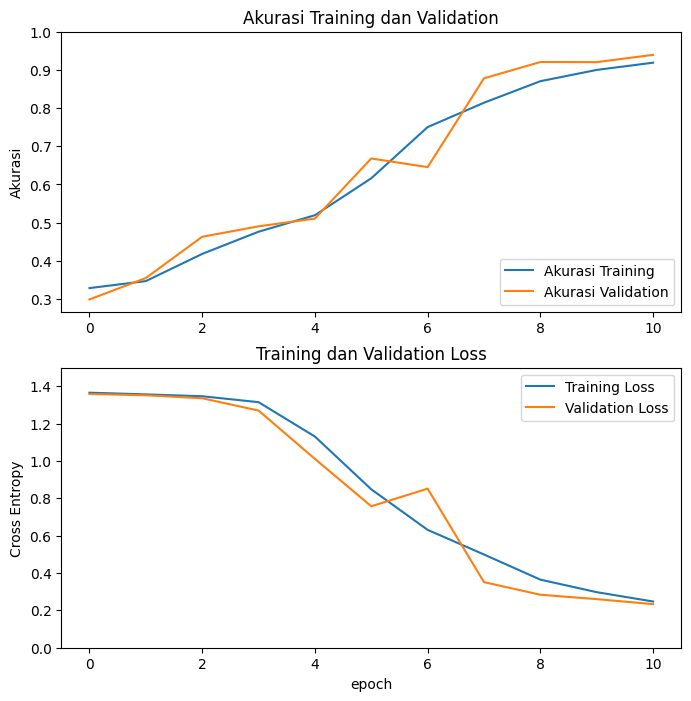

In [46]:
# Menampilkan output dari training

message = '--- Menampilkan output dari training ---'
print(message)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Akurasi Training')
plt.plot(val_acc, label='Akurasi Validation')
plt.legend(loc='lower right')
plt.ylabel('Akurasi')
plt.ylim([min(plt.ylim()),1])
plt.title('Akurasi Training dan Validation')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training dan Validation Loss')
plt.xlabel('epoch')
plt.show()